In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as ols

In [61]:
# When calling the load_dataset from the seaborn library
# it goes to the github repository and looks for that dataset
# the repository is: https://github.com/mwaskom/seaborn-data/tree/master

data_check = sns.load_dataset('penguins')
data_check.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [62]:
# Get an overview of the columsn in the data set, how many rows per column,
# and columns data type

data_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [63]:
# Check how many NAs are per column

data_check.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [64]:
# check how many species are in the dataset and how many record each has
data_check.groupby(["species"])["species"].count()

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: species, dtype: int64

In [65]:
# Since the Chinstrap specie has almost half data than the other two
# I will not see it's information
penguins = data_check[data_check["species"] != 'Chinstrap']

# Droping that specie, check again if the dataset has NAs
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [66]:
# Since still have rows with NA values
# Drop those rows

penguins = penguins.dropna().reset_index(drop=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
261,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
262,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
263,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


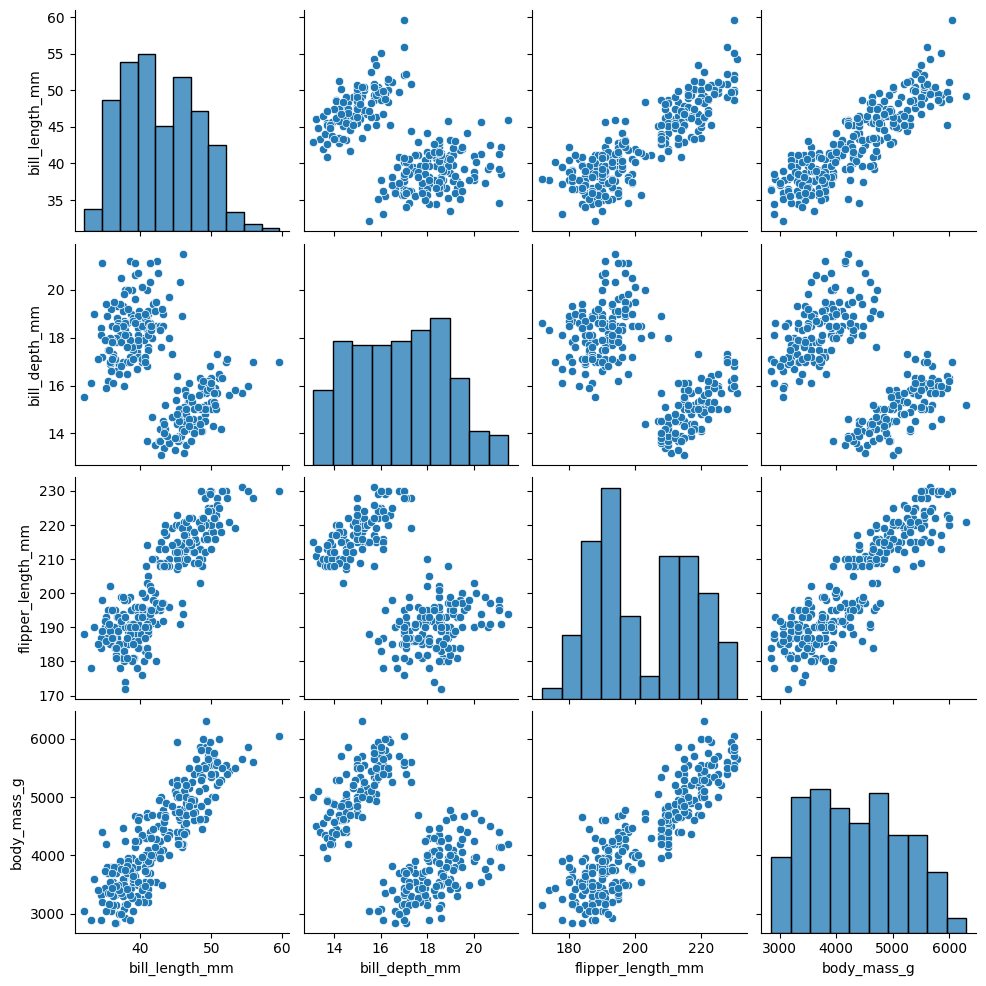

In [67]:
# Check the relation bewteen columns or attributes in the dataset
sns.pairplot(penguins)

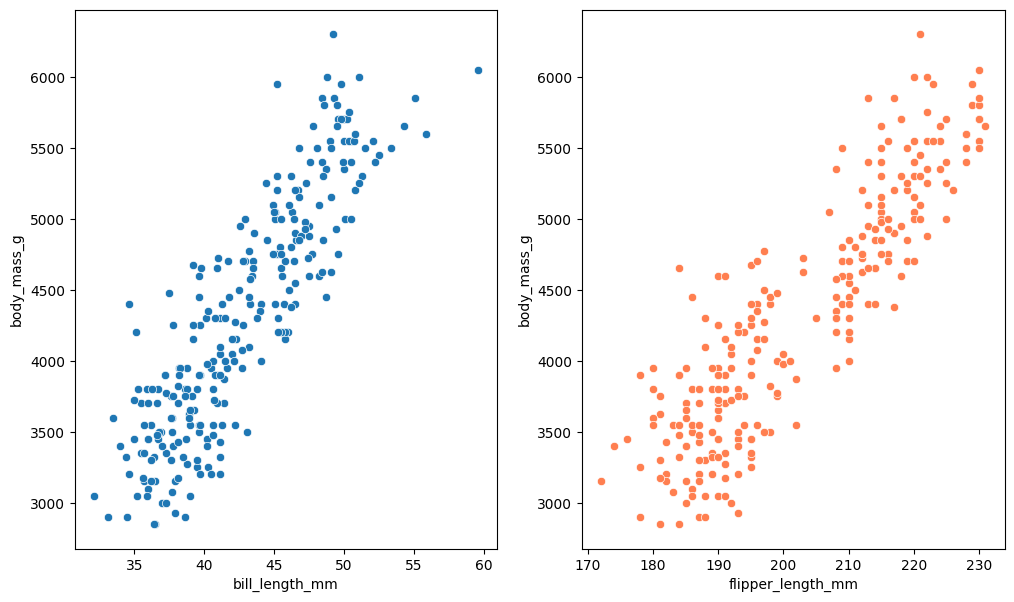

In [68]:
# After seeing how the varaibles correlate each other 
# There looks like bill_length and body_mass_g can be correlated linearly 
# and also there looks like a linear correlation between flipper_length_mm and body_mass_g

fig, axes = plt.subplots(1,2,figsize=(12,7))
sns.scatterplot(
    data = penguins,
    x = 'bill_length_mm',
    y = 'body_mass_g',
    ax= axes[0]
)

sns.scatterplot(
    data = penguins,
    x='flipper_length_mm',
    y = 'body_mass_g',
    ax = axes[1],
    color = "coral"
)
plt.show()

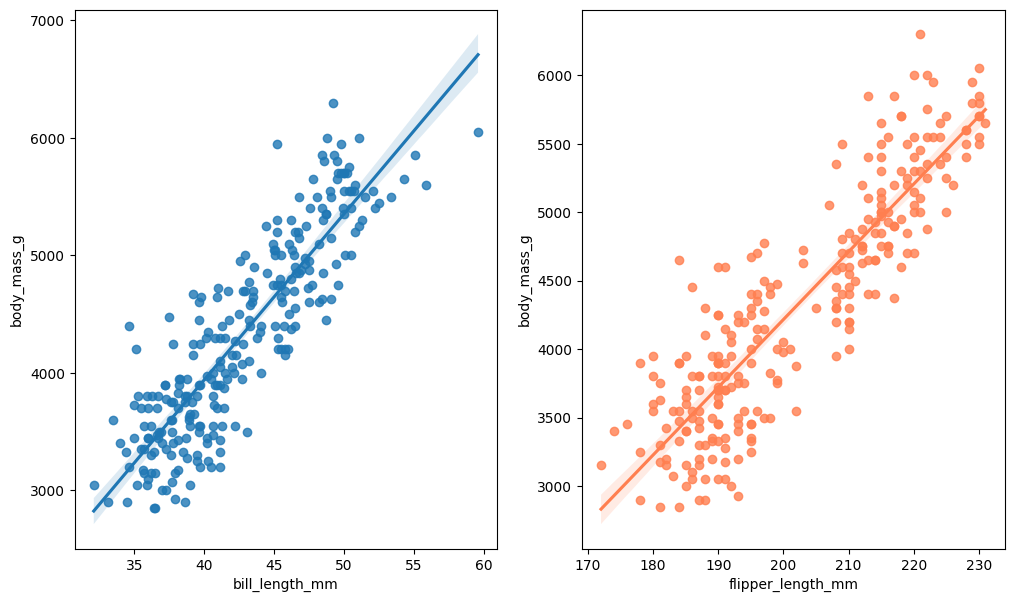

In [69]:
# if I would like to plot the regression 

fig, axes = plt.subplots(1,2,figsize = (12,7))

sns.regplot(
    data= penguins,
    x = 'bill_length_mm',
    y = 'body_mass_g',
    ax= axes[0]
)

sns.regplot(
    data = penguins,
    x='flipper_length_mm',
    y = 'body_mass_g',
    ax = axes[1],
    color = "coral"
)
plt.show()

In [70]:
bill_length_ols = ols.ols(data=penguins, formula='bill_length_mm ~ body_mass_g').fit()
bill_length_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           1.33e-85
Time:                        01:32:28   Log-Likelihood:                -619.15
No. Observations:                 265   AIC:                             1242.
Df Residuals:                     263   BIC:                             1249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.1818      0.812     23.626      0.000      17.583      20.780
body_mass_g     0.0054      0.000     29.569      0.000       0.005       0.006
==============================================================================
Omnibus:                        1.003   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.768
Skew:                          -0.117   Prob(JB):                        0.681
Kurtosis:                       3.121   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
bill_length_ols.params

# Define the line equation for the relation bill_length_mm and the body_mass_g

print(f"bill_length_mm = ({bill_length_ols.params['body_mass_g']:.2f} * body_mass_g ) + {bill_length_ols.params["Intercept"]:.2f}")

bill_length_mm = (0.01 * body_mass_g ) + 19.18


In [72]:
flipper_length_ols = ols.ols(data = penguins, formula='flipper_length_mm ~ body_mass_g').fit()
flipper_length_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     944.6
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           4.97e-89
Time:                        01:32:28   Log-Likelihood:                -891.53
No. Observations:                 265   AIC:                             1787.
Df Residuals:                     263   BIC:                             1794.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     133.8156      2.269     58.970      0.000     129.347     138.284
body_mass_g     0.0158      0.001     30.734      0.000       0.015       0.017
==============================================================================
Omnibus:                        9.779   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.160
Skew:                          -0.459   Prob(JB):                      0.00622
Kurtosis:                       2.719   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
flipper_length_ols.params

# Get the linear equation  for the relation flipper_length_mm and the body_mass_g
print(f"flipper_length_mm = ({flipper_length_ols.params["body_mass_g"]:.2f}* body_mass_g) + {flipper_length_ols.params["Intercept"]:.2f}")

flipper_length_mm = (0.02* body_mass_g) + 133.82


In [74]:
penguins.loc[:3,["bill_length_mm","flipper_length_mm",'body_mass_g']]

,bill_length_mm,flipper_length_mm,body_mass_g
0,39.1,181.0,3750.0
1,39.5,186.0,3800.0
2,40.3,195.0,3250.0
3,36.7,193.0,3450.0


In [ ]:
#Check the linear regresion results

body_mass = 3750

bill_length_by_mass = (body_mass * bill_length_ols.params["body_mass_g"]) + bill_length_ols.params['Intercept']
flipper_length_by_mass = (body_mass* flipper_length_ols.params["body_mass_g"]) + flipper_length_ols.params["Intercept"]

print(f"Bill Length by Body Mass: {bill_length_by_mass:.4f}")
print(f"Flipper Length by Body Mass: {flipper_length_by_mass:.4f}")
penguins.loc[:,["bill_length_mm","flipper_length_mm",'body_mass_g']][penguins["body_mass_g"] == 3750]

Bill Length by Body Mass: 39.5998
Flipper Length by Body Mass: 193.1332


,bill_length_mm,flipper_length_mm,body_mass_g
0,39.1,181.0,3750.0
53,37.6,194.0,3750.0
100,38.6,199.0,3750.0
143,37.8,193.0,3750.0


In [77]:
penguins.loc[:,["bill_length_mm","flipper_length_mm",'body_mass_g']][penguins["body_mass_g"] == 3750].mean()

bill_length_mm         38.275
flipper_length_mm     191.750
body_mass_g          3750.000
dtype: float64